In [8]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
ds = netCDF4.Dataset('../tests/zandmotor/scenarioA_04_wbthy_net.nc')
x = ds.variables['NetNode_x'][:]
y = ds.variables['NetNode_y'][:]

array([[  7.10000000e+04,   4.49500000e+05,   1.00000000e+00],
       [  7.44420895e+04,   4.53660772e+05,   1.00000000e+00],
       [  7.19764472e+04,   4.55700528e+05,   1.00000000e+00],
       [  6.85343576e+04,   4.51539757e+05,   1.00000000e+00]])

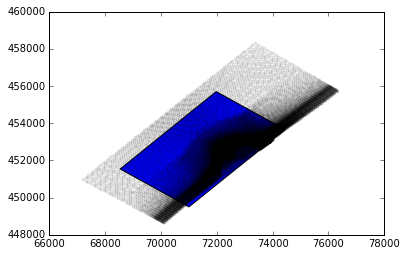

In [75]:
plt.plot(x, y, 'k.', alpha=0.1)

import matplotlib.transforms
affine = matplotlib.transforms.Affine2D()
affine.scale(9, 8)
affine.rotate(0.28*np.pi)
affine.translate(71000, 449500)


points = np.array([
    [0, 0],
    [600, 0],
    [600, 400],
    [0, 400]
])
xy1 = np.c_[points, np.ones_like(points[:,0])]
xy1
xy_world = np.dot(xy1, affine.get_matrix().T)
plt.fill(xy_world[:,0], xy_world[:,1])
# plt.xlim(0, 1000)
# plt.ylim(0, 1000)

xy_world


In [76]:
# we can compute the properties of the transformation like this:
angle = np.arctan2(xy_world[1, 1] - xy_world[0, 1], xy_world[1, 0] - xy_world[0, 0])
translate = xy_world[0, 0], xy_world[0, 1]
scale_x = np.sqrt((xy_world[1, 0] - xy_world[0, 0])**2 +  (xy_world[1, 1] - xy_world[0, 1])**2) / points[1, 0]
scale_y = np.sqrt((xy_world[2, 0] - xy_world[1, 0])**2 +  (xy_world[2, 1] - xy_world[1, 1])**2) / points[2, 1]
scale = scale_x, scale_y
angle, translate, scale


(0.87964594300514587,
 (71000.0, 449500.0),
 (9.0000000000000302, 7.9999999999999218))

In [81]:
inv_affine = matplotlib.transforms.Affine2D()
inv_affine.translate(-translate[0], -translate[1])
inv_affine.rotate(-angle)
inv_affine.scale(1.0/scale[0], 1.0/scale[1])
inv_affine.inverted()



Affine2D(array([[  5.73681591e+00,  -6.16410594e+00,   7.10000000e+04],
       [  6.93461918e+00,   5.09939192e+00,   4.49500000e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]]))

In [85]:
np.allclose(points, np.dot(xy_world, inv_affine.get_matrix().T)[:,:2])

True